# **Description of the problem - machine learning libraries and packages experimental setup**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import time

from zipfile import ZipFile


In [2]:
from sklearn.model_selection import RandomizedSearchCV


In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

  0% 0.00/58.4k [00:00<?, ?B/s]
100% 58.4k/58.4k [00:00<00:00, 73.3MB/s]


In [5]:
# extracting the compessed Dataset
data = '/content/heart-disease-prediction-using-logistic-regression.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

framingham.csv	heart-disease-prediction-using-logistic-regression.zip	kaggle.json  sample_data


#**Choice of dataset Data Mining**


In [8]:
# Load the dataset
data_path = '/content/framingham.csv'
framingham_data = pd.read_csv(data_path)

# Display the first few rows to confirm it's loaded correctly
print(framingham_data.head())


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [15]:
# drop the missing data
Heart_data = framingham_data.dropna()

# the shape after dropping the missing data
framingham_data.shape

(4238, 16)

In [17]:
print(framingham_data.isnull().sum())


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [18]:
# drop the missing data
framingham_data = framingham_data.dropna()

# the shape after dropping the missing data
framingham_data.shape

(3656, 16)

In [19]:
print(framingham_data.isnull().sum().sort_values(ascending=False))

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [20]:
# Showing the data after Converting categorical values to numeric values
framingham_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
# Displaying statistical information about the dataset
print(framingham_data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  3656.000000  3656.000000  3656.000000    3656.000000  3656.000000   
mean      0.443654    49.557440     1.979759       0.489059     9.022155   
std       0.496883     8.561133     1.022657       0.499949    11.918869   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3656.000000      3656.000000   3656.000000  3656.000000  3656.000000   
mean      0.030361         0.005744      0.311543     0.027079   236.873085   
std       0.171602         0.075581      0.463187     0.162335    44.096223   

In [22]:
# Information about data types and non-null counts
print(framingham_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB
None


# **Correlation Analysis:**
To check how each feature correlates with the target variable

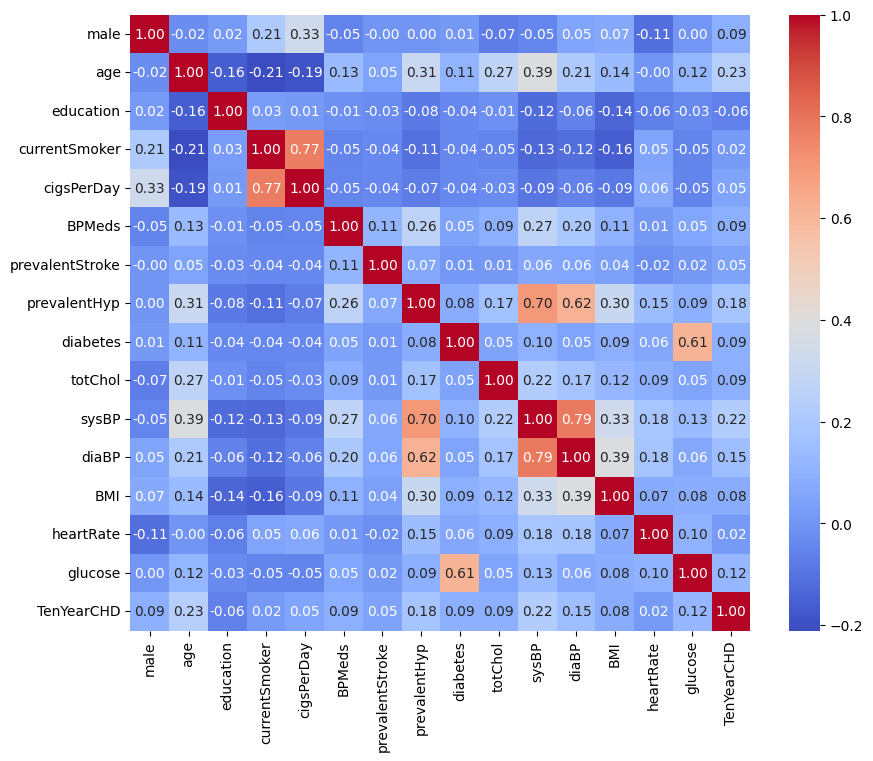

In [23]:
# Calculate the correlation matrix
corr_matrix = framingham_data.corr()

# Use seaborn to create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

# **Splitting the Data into Training and Testing Sets**


In [24]:
# heartRate (Maximum Heart Rate Achieved) is the target variable
X = Heart_data.drop('heartRate', axis=1) # Features
y = Heart_data['heartRate']              # Target


In [25]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Normalization**


In [26]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Choice of machine learning techniques**

# **Optimization/Parametrization**


# **Models Training**

# **1- Linear Regression**

In [27]:
# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

# **2-Random Forest Regressor**


In [28]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, Y_train)

RandomForestRegressor(random_state=42)

# **3- Gradient Boosting Regressor**


In [29]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_scaled, Y_train)

GradientBoostingRegressor(random_state=42)

# **Evaluate the performance of the machine learning methods metrics**


# **Evaluate Model**

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming rf_reg and gb_reg are already trained...

# Predictions
lin_predictions = lin_reg.predict(X_test)
rf_predictions = rf_reg.predict(X_test_scaled)
gb_predictions = gb_reg.predict(X_test_scaled)

# Calculate the metrics for each model
lin_mse = mean_squared_error(Y_test, lin_predictions)
lin_mae = mean_absolute_error(Y_test, lin_predictions)
lin_r2 = r2_score(Y_test, lin_predictions)

rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)

gb_mse = mean_squared_error(Y_test, gb_predictions)
gb_mae = mean_absolute_error(Y_test, gb_predictions)
gb_r2 = r2_score(Y_test, gb_predictions)

# Create a dictionary with the model names and their corresponding metrics
model_metrics = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MSE': [lin_mse, rf_mse, gb_mse],
    'MAE': [lin_mae, rf_mae, gb_mae],
    'R2': [lin_r2, rf_r2, gb_r2]
}

# Convert the dictionary to a DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Display the DataFrame
print(comparison_df)


                         Model         MSE       MAE        R2
0            Linear Regression  137.609384  9.377027  0.059675
1      Random Forest Regressor  145.445384  9.691954  0.006129
2  Gradient Boosting Regressor  138.934627  9.465155  0.050619


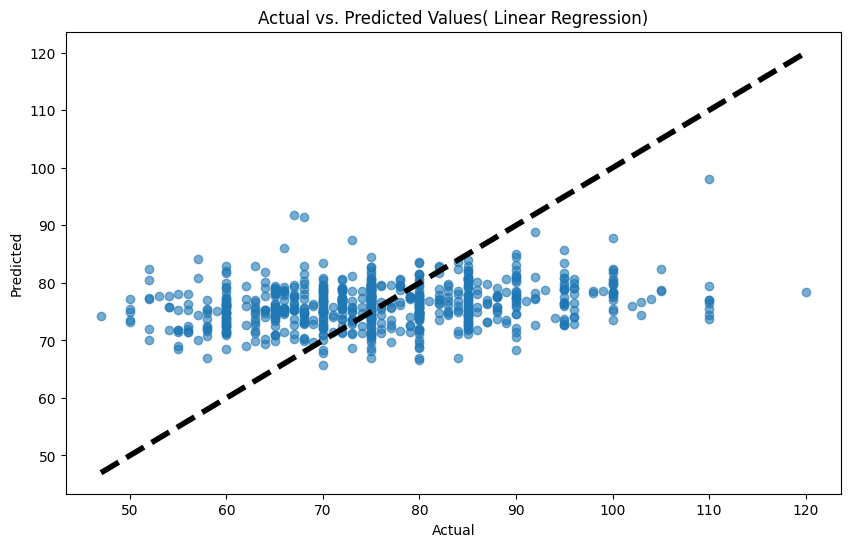

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, lin_predictions, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values( Linear Regression)')
plt.show()


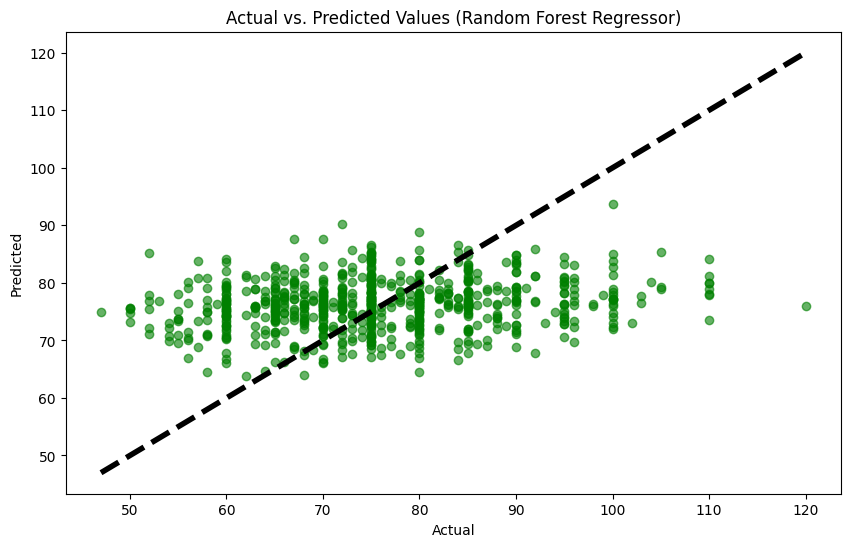

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, rf_predictions, alpha=0.6, color='green')  # Using green for differentiation
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
plt.show()


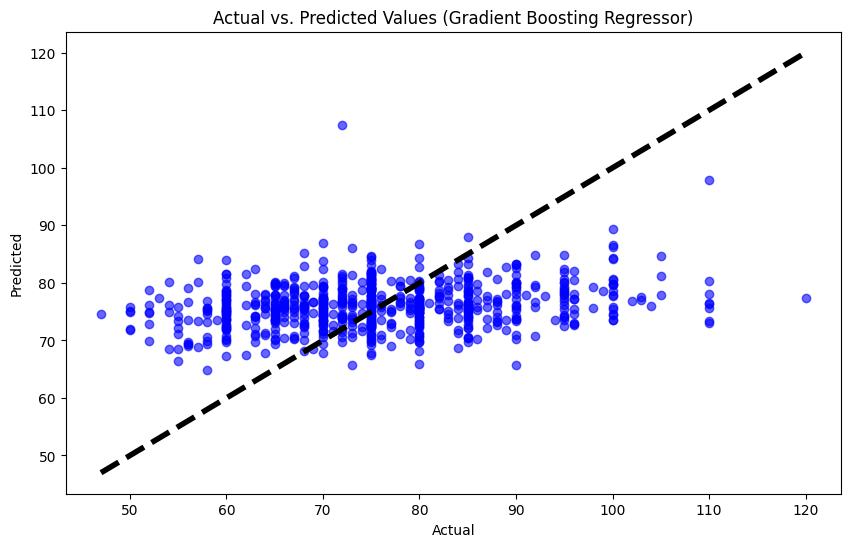

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, gb_predictions, alpha=0.6, color='blue')  # Using blue for differentiation
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Gradient Boosting Regressor)')
plt.show()